#Import Libaries

In [1]:
pip install pyvi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 23.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 42.2 MB/s eta 0:00:00


In [2]:
import pandas as pd
import re
import string
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from pyvi import ViTokenizer
from sklearn.model_selection import train_test_split
import seaborn as sb
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import  LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
import joblib
from sklearn.metrics import confusion_matrix, f1_score, classification_report, accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay

#Data Loading


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dataset = pd.read_csv('/content/FinalDataset - Sheet1.csv')
dataset

,Bí thư Hà Nội lo hàng trăm dự án bất động sản 'chết đứng',"""Cả nước hiện không biết bao nhiêu dự án bất động sản nằm chết đứng. Hà Nội cũng rất nhiều, với 712 dự án chậm triển khai lâu năm, vừa rồi ra đề án đã xử lý hủy được hơn 100 dự án, thu lại để đấu thầu, đấu giá được vài nghìn ha"", Bí thư Thành ủy Hà Nội Đinh Tiến Dũng dẫn số liệu tại phiên họp tổ của Quốc hội thảo luận về kinh tế xã hội sáng 24/10.Theo ông Dũng, nhiều dự án nằm im 10-20 năm khiến người dân bức xúc, là điểm nóng về mất an ninh trật tự. Khai thông được thị trường bất động sản sẽ tạo ra sức lan tỏa rất lớn thúc đẩy nhiều ngành nghề tăng trưởng; ổn định kinh tế vĩ mô; tín dụng ngân hàng, trái phiếu doanh nghiệp; đời sống việc làm.Tuy nhiên, giải pháp của Chính phủ đưa ra rất nhiều nhưng ""hiệu quả thực chất vẫn còn hạn chế"". Doanh nghiệp hỏi lên, hỏi xuống nhưng cũng không rõ phải làm thế nào.Bí thư Thành ủy Hà Nội Đinh Tiến Dũng phát biểu tại phiên họp tổ sáng 24/10. Ảnh:",1
0,Bộ trưởng Công an báo cáo Quốc hội về phòng ch...,"Theo Bộ trưởng Công an Tô Lâm, từ tháng 10/202...",1
1,Bộ trưởng Lê Minh Hoan: Xử lý nghiêm tàu cá vi...,Chất vấn Bộ trưởng Nông nghiệp và Phát triển n...,1
2,Cấm lợi dụng quan hệ gây sức ép trong thanh tr...,Thường trực Ban Bí thư Trương Thị Mai vừa thay...,1
3,Cần khắc phục tình trạng không muốn thoát nghèo',"Chiều 30/10, giải trình trước Quốc hội về kết ...",1
4,Cắt điện nước công trình vi phạm 'là không nhâ...,"""Như vậy là không nhân văn. Đây cũng là dùng b...",1
...,...,...,...
4548,Mua bảo hiểm nhân thọ cho trụ cột gia đình,Trước đây tôi có hơi kỳ thị về bảo hiểm nhân t...,1
4549,Những người mới U50 đã rệu rã,"Tuần rồi, ông bạn mới 46 tuổi của tôi xin nghỉ...",1
4550,Tôi đáng thương hay chỉ biết đòi hỏi,Tuổi 17 tôi nằm liệt trên giường chiến đấu với...,1
4551,Những sự thật về tuổi già,"Tuổi già là sự khởi đầu một thời kỳ ""vàng son""...",1


#Data Processing

In [4]:
dataset.columns = ['Title','Text','Is_neg']
dataset.head()

,Title,Text,Is_neg
0,Bộ trưởng Công an báo cáo Quốc hội về phòng ch...,"Theo Bộ trưởng Công an Tô Lâm, từ tháng 10/202...",1
1,Bộ trưởng Lê Minh Hoan: Xử lý nghiêm tàu cá vi...,Chất vấn Bộ trưởng Nông nghiệp và Phát triển n...,1
2,Cấm lợi dụng quan hệ gây sức ép trong thanh tr...,Thường trực Ban Bí thư Trương Thị Mai vừa thay...,1
3,Cần khắc phục tình trạng không muốn thoát nghèo',"Chiều 30/10, giải trình trước Quốc hội về kết ...",1
4,Cắt điện nước công trình vi phạm 'là không nhâ...,"""Như vậy là không nhân văn. Đây cũng là dùng b...",1


In [5]:
#Remove NaN
if dataset.isnull().values.any():
  dataset = dataset.dropna()
dataset

,Title,Text,Is_neg
0,Bộ trưởng Công an báo cáo Quốc hội về phòng ch...,"Theo Bộ trưởng Công an Tô Lâm, từ tháng 10/202...",1
1,Bộ trưởng Lê Minh Hoan: Xử lý nghiêm tàu cá vi...,Chất vấn Bộ trưởng Nông nghiệp và Phát triển n...,1
2,Cấm lợi dụng quan hệ gây sức ép trong thanh tr...,Thường trực Ban Bí thư Trương Thị Mai vừa thay...,1
3,Cần khắc phục tình trạng không muốn thoát nghèo',"Chiều 30/10, giải trình trước Quốc hội về kết ...",1
4,Cắt điện nước công trình vi phạm 'là không nhâ...,"""Như vậy là không nhân văn. Đây cũng là dùng b...",1
...,...,...,...
4548,Mua bảo hiểm nhân thọ cho trụ cột gia đình,Trước đây tôi có hơi kỳ thị về bảo hiểm nhân t...,1
4549,Những người mới U50 đã rệu rã,"Tuần rồi, ông bạn mới 46 tuổi của tôi xin nghỉ...",1
4550,Tôi đáng thương hay chỉ biết đòi hỏi,Tuổi 17 tôi nằm liệt trên giường chiến đấu với...,1
4551,Những sự thật về tuổi già,"Tuổi già là sự khởi đầu một thời kỳ ""vàng son""...",1


In [6]:
#Remove Duplication
if dataset['Title'].duplicated().any():
  dataset = dataset.drop_duplicates()
dataset.shape

(4499, 3)

In [7]:
#Lowercasing
dataset[['Title','Text']] = dataset[['Title','Text']].apply(lambda x: x.str.lower())
dataset.head()

<ipython-input-7-00d2c11c027b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[['Title','Text']] = dataset[['Title','Text']].apply(lambda x: x.str.lower())


,Title,Text,Is_neg
0,bộ trưởng công an báo cáo quốc hội về phòng ch...,"theo bộ trưởng công an tô lâm, từ tháng 10/202...",1
1,bộ trưởng lê minh hoan: xử lý nghiêm tàu cá vi...,chất vấn bộ trưởng nông nghiệp và phát triển n...,1
2,cấm lợi dụng quan hệ gây sức ép trong thanh tr...,thường trực ban bí thư trương thị mai vừa thay...,1
3,cần khắc phục tình trạng không muốn thoát nghèo',"chiều 30/10, giải trình trước quốc hội về kết ...",1
4,cắt điện nước công trình vi phạm 'là không nhâ...,"""như vậy là không nhân văn. đây cũng là dùng b...",1


In [8]:
#Remove Punctuations
def remove_punctuation(title):
    title = [char for char in title if char not in string.punctuation]
    removed = ''.join(title)
    return removed
dataset['Title'] = dataset['Title'].apply(remove_punctuation)
dataset['Text'] = dataset['Text'].apply(remove_punctuation)
dataset

<ipython-input-8-4452987bc72b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Title'] = dataset['Title'].apply(remove_punctuation)
<ipython-input-8-4452987bc72b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Text'] = dataset['Text'].apply(remove_punctuation)


,Title,Text,Is_neg
0,bộ trưởng công an báo cáo quốc hội về phòng ch...,theo bộ trưởng công an tô lâm từ tháng 102022 ...,1
1,bộ trưởng lê minh hoan xử lý nghiêm tàu cá vi ...,chất vấn bộ trưởng nông nghiệp và phát triển n...,1
2,cấm lợi dụng quan hệ gây sức ép trong thanh tr...,thường trực ban bí thư trương thị mai vừa thay...,1
3,cần khắc phục tình trạng không muốn thoát nghèo,chiều 3010 giải trình trước quốc hội về kết qu...,1
4,cắt điện nước công trình vi phạm là không nhân...,như vậy là không nhân văn đây cũng là dùng biệ...,1
...,...,...,...
4548,mua bảo hiểm nhân thọ cho trụ cột gia đình,trước đây tôi có hơi kỳ thị về bảo hiểm nhân t...,1
4549,những người mới u50 đã rệu rã,tuần rồi ông bạn mới 46 tuổi của tôi xin nghỉ ...,1
4550,tôi đáng thương hay chỉ biết đòi hỏi,tuổi 17 tôi nằm liệt trên giường chiến đấu với...,1
4551,những sự thật về tuổi già,tuổi già là sự khởi đầu một thời kỳ vàng son t...,1


In [9]:
#Remove numbers
def remove_numbers(text):
    return re.sub("\d+", "", text)

dataset['Title'] = dataset['Title'].apply(remove_numbers)
dataset['Text'] = dataset['Text'].apply(remove_numbers)
dataset

<ipython-input-9-238280ed7a09>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Title'] = dataset['Title'].apply(remove_numbers)
<ipython-input-9-238280ed7a09>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Text'] = dataset['Text'].apply(remove_numbers)


,Title,Text,Is_neg
0,bộ trưởng công an báo cáo quốc hội về phòng ch...,theo bộ trưởng công an tô lâm từ tháng đến hế...,1
1,bộ trưởng lê minh hoan xử lý nghiêm tàu cá vi ...,chất vấn bộ trưởng nông nghiệp và phát triển n...,1
2,cấm lợi dụng quan hệ gây sức ép trong thanh tr...,thường trực ban bí thư trương thị mai vừa thay...,1
3,cần khắc phục tình trạng không muốn thoát nghèo,chiều giải trình trước quốc hội về kết quả th...,1
4,cắt điện nước công trình vi phạm là không nhân...,như vậy là không nhân văn đây cũng là dùng biệ...,1
...,...,...,...
4548,mua bảo hiểm nhân thọ cho trụ cột gia đình,trước đây tôi có hơi kỳ thị về bảo hiểm nhân t...,1
4549,những người mới u đã rệu rã,tuần rồi ông bạn mới tuổi của tôi xin nghỉ ph...,1
4550,tôi đáng thương hay chỉ biết đòi hỏi,tuổi tôi nằm liệt trên giường chiến đấu với t...,1
4551,những sự thật về tuổi già,tuổi già là sự khởi đầu một thời kỳ vàng son t...,1


In [10]:
#Tokenizer
dataset['Title'] = dataset['Title'].apply(ViTokenizer.tokenize)
dataset['Text'] = dataset['Text'].apply(ViTokenizer.tokenize)
dataset.head()

<ipython-input-10-ca7250b17f94>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Title'] = dataset['Title'].apply(ViTokenizer.tokenize)
<ipython-input-10-ca7250b17f94>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Text'] = dataset['Text'].apply(ViTokenizer.tokenize)


,Title,Text,Is_neg
0,bộ_trưởng công_an báo_cáo quốc_hội về phòng_ch...,theo bộ_trưởng công_an tô lâm từ tháng đến hết...,1
1,bộ_trưởng lê minh hoan xử_lý nghiêm tàu cá vi_...,chất_vấn bộ_trưởng nông_nghiệp và phát_triển n...,1
2,cấm lợi_dụng quan_hệ gây sức_ép trong thanh_tr...,thường_trực_ban bí_thư trương thị mai vừa thay...,1
3,cần khắc_phục tình_trạng không muốn thoát nghèo,chiều giải_trình trước quốc_hội về kết_quả_thự...,1
4,cắt điện nước công_trình vi_phạm là không nhân...,như_vậy là không nhân_văn đây cũng là dùng biệ...,1


In [11]:
import requests

# URL of file stopwords
url = 'https://raw.githubusercontent.com/stopwords/vietnamese-stopwords/master/vietnamese-stopwords.txt'

# Request
response = requests.get(url)

if response.status_code == 200:
    # Save file 'vietnamese-stopwords.txt'
    with open('vietnamese-stopwords.txt', 'w') as f:
        f.write(response.text)
else:
    print('Error:', response.status_code)

with open('vietnamese-stopwords.txt', 'r') as f:
    vietnamese_stopwords = f.read().splitlines()

In [12]:
vietnamese_stopwords

['a lô',
 'a ha',
 'ai',
 'ai ai',
 'ai nấy',
 'ai đó',
 'alô',
 'amen',
 'anh',
 'anh ấy',
 'ba',
 'ba ba',
 'ba bản',
 'ba cùng',
 'ba họ',
 'ba ngày',
 'ba ngôi',
 'ba tăng',
 'bao giờ',
 'bao lâu',
 'bao nhiêu',
 'bao nả',
 'bay biến',
 'biết',
 'biết bao',
 'biết bao nhiêu',
 'biết chắc',
 'biết chừng nào',
 'biết mình',
 'biết mấy',
 'biết thế',
 'biết trước',
 'biết việc',
 'biết đâu',
 'biết đâu chừng',
 'biết đâu đấy',
 'biết được',
 'buổi',
 'buổi làm',
 'buổi mới',
 'buổi ngày',
 'buổi sớm',
 'bà',
 'bà ấy',
 'bài',
 'bài bác',
 'bài bỏ',
 'bài cái',
 'bác',
 'bán',
 'bán cấp',
 'bán dạ',
 'bán thế',
 'bây bẩy',
 'bây chừ',
 'bây giờ',
 'bây nhiêu',
 'bèn',
 'béng',
 'bên',
 'bên bị',
 'bên có',
 'bên cạnh',
 'bông',
 'bước',
 'bước khỏi',
 'bước tới',
 'bước đi',
 'bạn',
 'bản',
 'bản bộ',
 'bản riêng',
 'bản thân',
 'bản ý',
 'bất chợt',
 'bất cứ',
 'bất giác',
 'bất kì',
 'bất kể',
 'bất kỳ',
 'bất luận',
 'bất ngờ',
 'bất nhược',
 'bất quá',
 'bất quá chỉ',
 'bất thình l

In [13]:
dataset['Title'] = dataset['Title'].apply(lambda x: ' '.join([word for word in x.split() if word not in (vietnamese_stopwords)]))
dataset['Text'] = dataset['Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (vietnamese_stopwords)]))
dataset.head()

<ipython-input-13-fc90d088f02f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Title'] = dataset['Title'].apply(lambda x: ' '.join([word for word in x.split() if word not in (vietnamese_stopwords)]))
<ipython-input-13-fc90d088f02f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Text'] = dataset['Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (vietnamese_stopwords)]))


,Title,Text,Is_neg
0,bộ_trưởng công_an báo_cáo quốc_hội phòng_chống...,bộ_trưởng công_an tô lâm lực_lượng công_an điề...,1
1,bộ_trưởng lê minh hoan xử_lý nghiêm tàu cá vi_...,chất_vấn bộ_trưởng nông_nghiệp phát_triển nông...,1
2,cấm lợi_dụng quan_hệ sức_ép thanh_tra kiểm_toán,thường_trực_ban bí_thư trương thị mai thay_mặt...,1
3,khắc_phục tình_trạng thoát nghèo,chiều giải_trình quốc_hội kết_quả_thực_hiện ch...,1
4,cắt điện công_trình vi_phạm nhân_văn,như_vậy nhân_văn biện_pháp phi trật_tự duy_trì...,1


#Data Statistics

In [14]:
print("Negative news size: ", len(dataset[dataset['Is_neg']==1]), "\nPositive news size: ", len(dataset[dataset['Is_neg']==0]))

Negative news size:  2161 
Positive news size:  2338


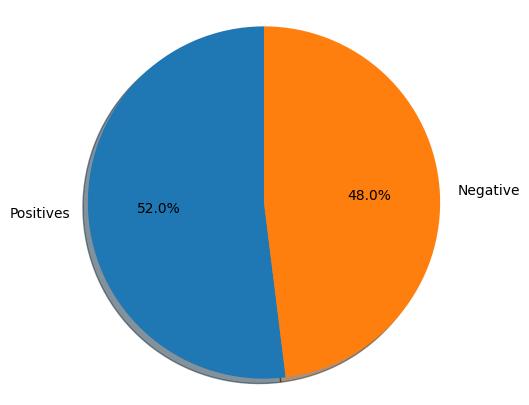

In [15]:
# Declare a figure with a custom size
fig = plt.figure(figsize=(5, 5))

# labels for the two classes
labels = 'Positives', 'Negative'

# Sizes for each slide
sizes = [len(dataset[dataset['Is_neg']==0]), len(dataset[dataset['Is_neg']==1])]

# Declare pie chart, where the slices will be ordered and plotted counter-clockwise:
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Display the chart
plt.show()

##Word Statistics

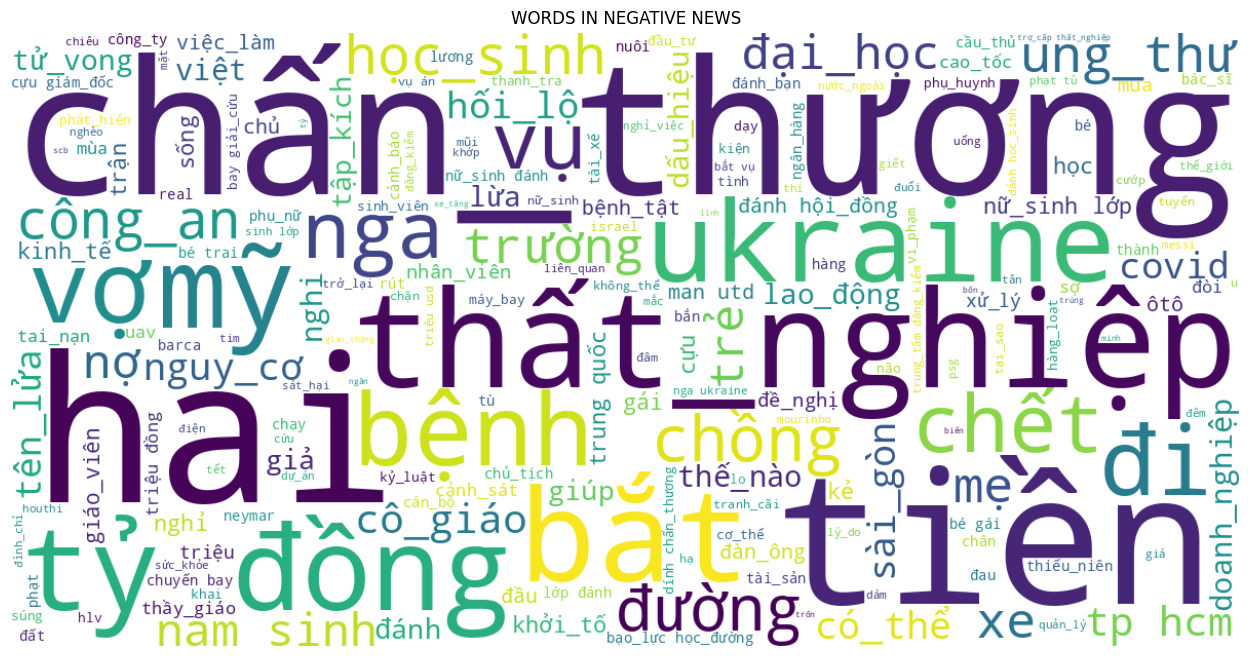

In [16]:
#Word in negative news
negative = dataset.loc[(dataset['Is_neg'] == 1)]
wordcloud = WordCloud(width = 1200, height = 600, background_color="white").generate(' '.join(negative.Title))
plt.figure(figsize = (16, 8), facecolor = None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("WORDS IN NEGATIVE NEWS")
plt.axis("off")
plt.show()

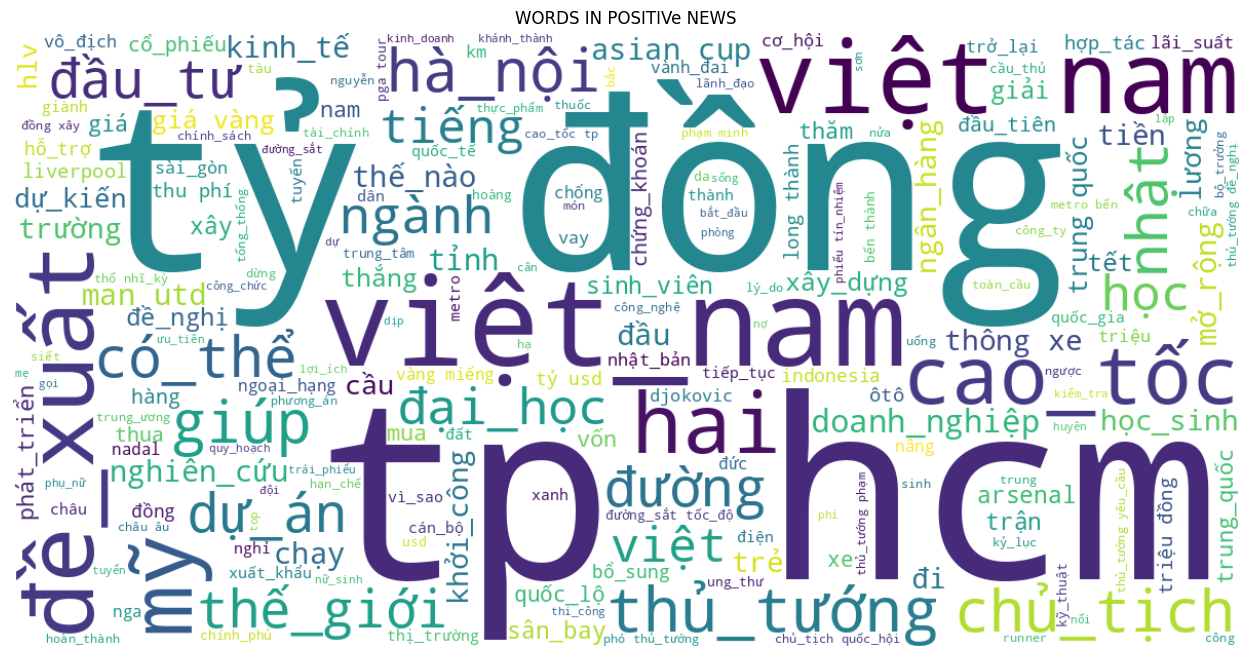

In [17]:
#Word in postive news
positive = dataset.loc[(dataset['Is_neg'] == 0)]
wordcloud = WordCloud(width = 1200, height = 600, background_color="white").generate(' '.join(positive.Title))
plt.figure(figsize = (16, 8), facecolor = None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("WORDS IN POSITIVe NEWS")
plt.axis("off")
plt.show()

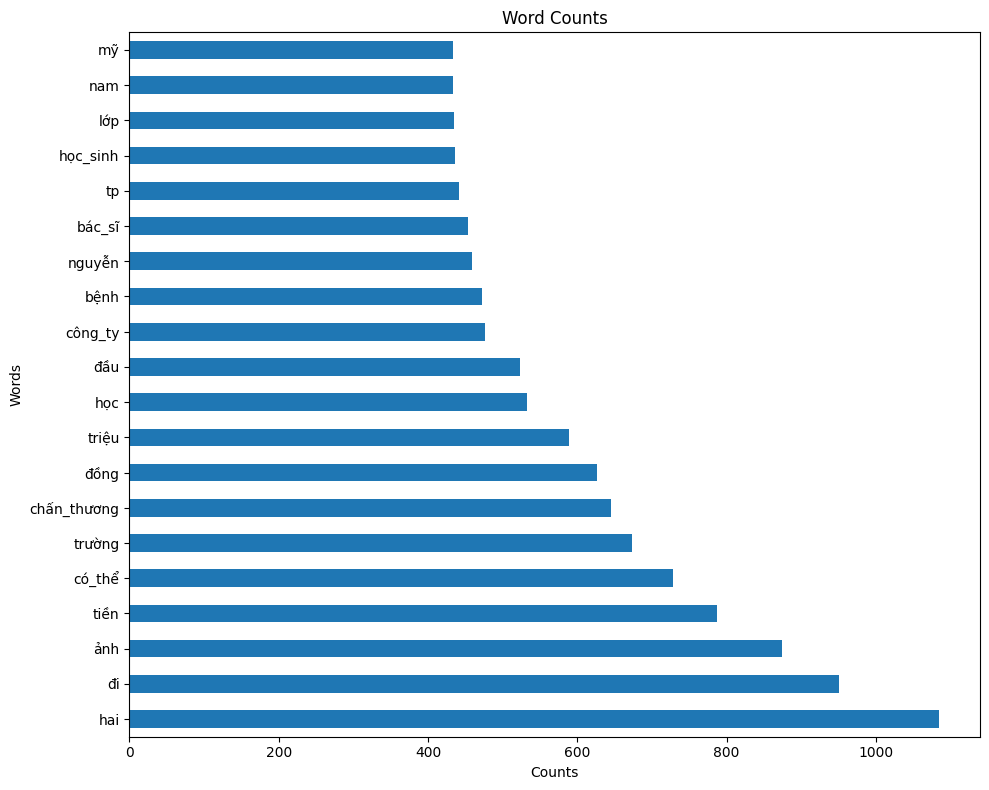

In [18]:
words = negative.Title.str.split() + negative.Text.str.split()

# Thống kê số lượng mỗi từ
word_counts = words.explode().value_counts()

word_counts.sort_values(ascending=False)[:20].plot(kind='barh', figsize=(10,8))

plt.xlabel('Counts')
plt.ylabel('Words')
plt.title('Word Counts')

plt.tight_layout()
plt.show()


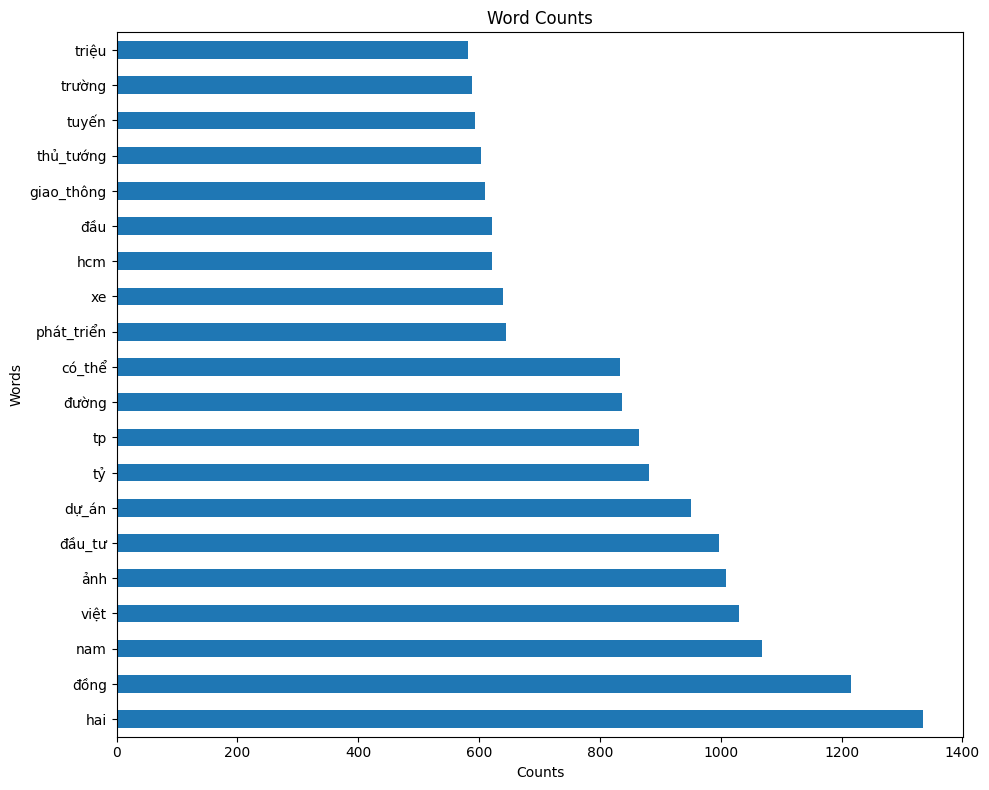

In [19]:
words = positive.Title.str.split() + positive.Text.str.split()

# Thống kê số lượng mỗi từ
word_counts = words.explode().value_counts()

word_counts.sort_values(ascending=False)[:20].plot(kind='barh', figsize=(10,8))

plt.xlabel('Counts')
plt.ylabel('Words')
plt.title('Word Counts')

plt.tight_layout()
plt.show()

#Split Data

In [20]:
train, dev = train_test_split(dataset, test_size = 0.4, random_state = 42)

In [21]:
print('Shape of train',train.shape)
print('Shape of dev',dev.shape)

Shape of train (2699, 3)
Shape of dev (1800, 3)


<ipython-input-22-25fa3e353ecd>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(x='Is_neg', data = train, palette='hls').set(title = "Distribution in train")


[Text(0.5, 1.0, 'Distribution in train')]

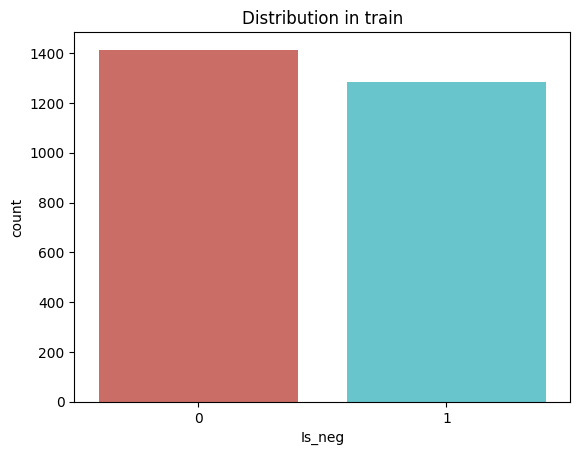

In [22]:
sb.countplot(x='Is_neg', data = train, palette='hls').set(title = "Distribution in train")

<ipython-input-23-a03f6806cc02>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(x='Is_neg', data = dev, palette='hls').set(title = "Distribution in dev")


[Text(0.5, 1.0, 'Distribution in dev')]

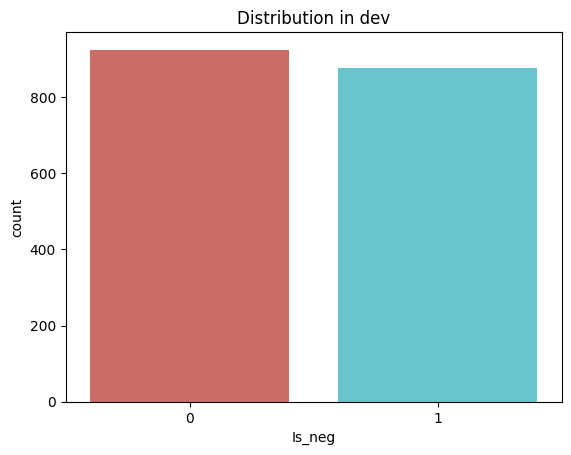

In [23]:
sb.countplot(x='Is_neg', data = dev, palette='hls').set(title = "Distribution in dev")

#Feature Engineering

##Count Vectors

In [24]:
Count_Vectorizer = CountVectorizer()

##Tf-IDF Vectors


In [25]:
Tf_IDF_Vectorizer = TfidfVectorizer(analyzer='char',ngram_range=(1,2))

#Modeling

In [26]:
class Model:
    def __init__(self, Vectorizer, Model, train, train_is_neg, dev, dev_is_neg):
        self.vectorizer = Vectorizer
        self.model = Model
        self.train = train['Title'] + ' ' + train['Text']
        self.train_is_neg = train_is_neg
        self.dev = dev['Title'] + ' ' + dev['Text']
        self.dev_is_neg = dev_is_neg

    def fit(self):
        self.vectorizer.fit(self.train)
        features = self.vectorizer.transform(self.train)
        self.model.fit(features, self.train_is_neg)

    def evaluate(self):
        features = self.vectorizer.transform(self.dev)
        dev_pred = self.model.predict(features)

        acc = accuracy_score(self.dev_is_neg, dev_pred)
        recall = recall_score(self.dev_is_neg, dev_pred)
        precision = precision_score(self.dev_is_neg, dev_pred)
        f1 = f1_score(self.dev_is_neg, dev_pred)

        print(f"Accuracy: {acc: .4f}")
        print(f"Recall: {recall: .4f}")
        print(f"Precision: {precision: .4f}")
        print(f"F1: {f1: .4f}")

        cm = confusion_matrix(self.dev_is_neg, dev_pred)

        disp = ConfusionMatrixDisplay(
            confusion_matrix=cm, display_labels=["negative", "positive"]
        )

        disp.plot()
        plt.show()

##Logistic Regression

Accuracy:  0.8489
Recall:  0.8390
Precision:  0.8487
F1:  0.8439


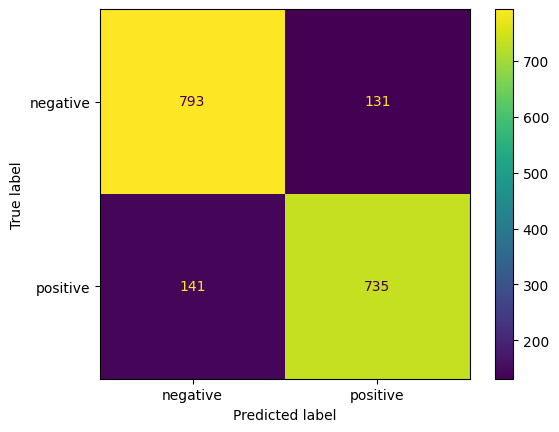

In [27]:
#Count_vectorizer
model = Model(Count_Vectorizer, LogisticRegression(max_iter = 10000), train, train['Is_neg'], dev, dev['Is_neg'])
model.fit()
model.evaluate()

Accuracy:  0.8178
Recall:  0.7671
Precision:  0.8442
F1:  0.8038


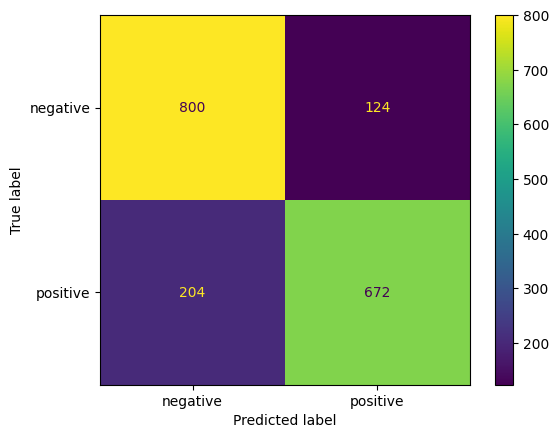

In [28]:
#Tf_IDF
model = Model(Tf_IDF_Vectorizer, LogisticRegression(max_iter = 10000), train, train['Is_neg'], dev, dev['Is_neg'])
model.fit()
model.evaluate()

##SVM

Accuracy:  0.8539
Recall:  0.8379
Precision:  0.8585
F1:  0.8481


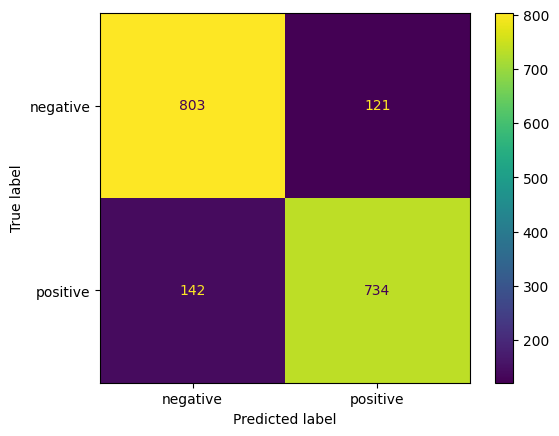

In [29]:
model = Model(Count_Vectorizer, svm.SVC(max_iter = 10000), train, train['Is_neg'], dev, dev['Is_neg'])
model.fit()
model.evaluate()

Accuracy:  0.8289
Recall:  0.7785
Precision:  0.8568
F1:  0.8158


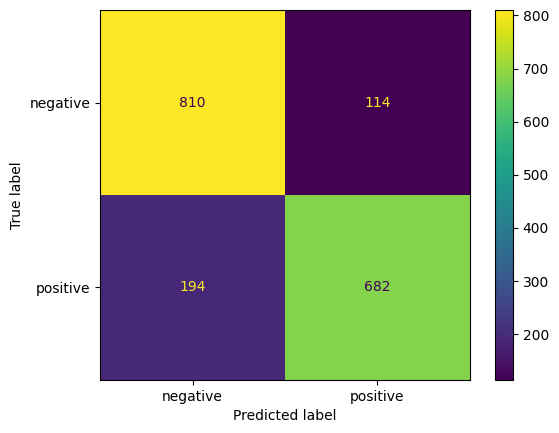

In [30]:
model = Model(Tf_IDF_Vectorizer, svm.SVC(max_iter = 10000), train, train['Is_neg'], dev, dev['Is_neg'])
model.fit()
model.evaluate()

##Naive Bayes

Accuracy:  0.8578
Recall:  0.8413
Precision:  0.8630
F1:  0.8520


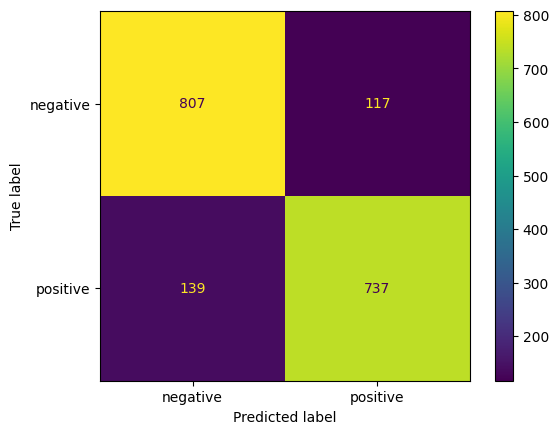

In [31]:
model = Model(Count_Vectorizer, BernoulliNB(), train, train['Is_neg'], dev, dev['Is_neg'])
model.fit()
model.evaluate()

Accuracy:  0.7867
Recall:  0.7751
Precision:  0.7841
F1:  0.7796


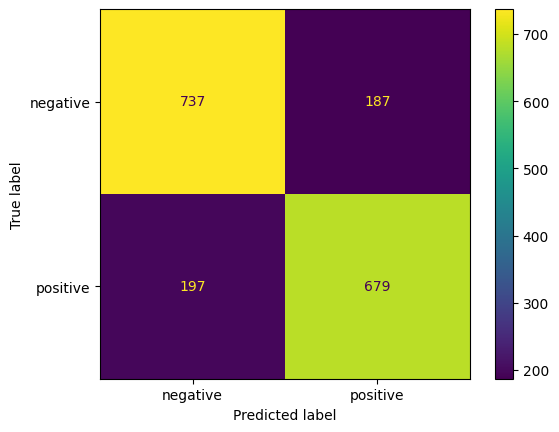

In [32]:
model = Model(Tf_IDF_Vectorizer, BernoulliNB(), train, train['Is_neg'], dev, dev['Is_neg'])
model.fit()
model.evaluate()

#Test

In [33]:
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline

In [34]:
pipelines = [
    ('LR', Pipeline([('Vectorizer', CountVectorizer()), ('LR', LogisticRegression())])),
    ('SVM', Pipeline([('Vectorizer', CountVectorizer()), ('SVM', svm.SVC())])),
    ('NB', Pipeline([('Vectorizer', CountVectorizer()), ('NB', BernoulliNB())])),
]

results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=10, random_state=42, shuffle=True)
    f1_scores = []
    for train_idx, dev_idx in kfold.split(dataset['Title'] + dataset['Text']):
        train_fold, dev_fold = dataset.iloc[train_idx], dataset.iloc[dev_idx]
        model.fit(train_fold['Title'] + train_fold['Text'], train_fold['Is_neg'])
        dev_pred = model.predict(dev_fold['Title'] + dev_fold['Text'])
        f1_scores.append(f1_score(dev_fold['Is_neg'], dev_pred))

    mean_f1 = sum(f1_scores) / len(f1_scores)
    results.append(mean_f1)
    names.append(name)
    msg = "%s: %f" % (name, mean_f1)
    print(msg)

    joblib.dump(model, name + '.pkl')


LR: 0.850459
SVM: 0.848958
NB: 0.848635


In [35]:
Final_Model = joblib.load(open('LR.pkl', 'rb'))

In [50]:
df = pd.DataFrame(columns=['Text+Title'])

df['Text+Title'] = [input('Text+Title: ')]

if Final_Model.predict(df['Text+Title'])==1:
  print('Negative News')
else:
  print('Non-Negative News')

Text+Title: anh bị đau
Negative News
